In [1]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import namedtuple, defaultdict, Counter
from glob import glob
import itertools
import os
import pickle
import re
import socket
import subprocess
import sys

np.set_printoptions(suppress=True, precision=2, threshold=20)
sys.path += ['../src/']

display(HTML("<h3>Runned on %s</h3><h4>Last commit: %s</h4><h4>Conda env: %s</h4>" % (
    socket.gethostname(),
    subprocess.run(["git","log", "-1", "--pretty=%h %s"],
        check=False, capture_output=True).stdout.decode() or 'none.',
    (re.findall(""".*envs[\\\/](.*?)[\\\/]""", sys.executable) or [sys.executable])[0]
)))


In [2]:
renaming = {
    'smart random MT': 'Proportional',
    'time series MT': 'Time series',
    'constant predictor': 'Constant predictor',
    'learned MT': 'Learnable ABM',
}

In [3]:
def define_palette():
    (blue, orange, green, red, purple, 
     brown, pink, gray, gold, azure) = sns.color_palette('deep')
    palette = {
        "smart random MT": gray,
        "time series MT": azure,
        'constant predictor':purple,
        "learned MT": orange,
    }
    return {renaming[k]: v for k, v in palette.items()}

display(sns.color_palette('deep'))
palette = define_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [4]:
for var_name in ("Nd", "P"):
    df = pd.read_csv("../data/main-figure-forecasting-only-" + var_name + ".csv")
    display(HTML("<h1>" + var_name + "</h1>"))
    medians = {g: df[df.group == g].rmse.median() for g in df.group.unique()}
    display(HTML("<h4>Median RMSE</h1>"))
    display(medians)
    means = {g: df[df.group == g].rmse.mean() for g in df.group.unique()}
    display(HTML("<h4>Mean RMSE</h1>"))
    display(means)

{'smart random MT': 2.3438191255277623,
 'time series MT': 1.4169693027101322,
 'constant predictor': 0.6681187980935228,
 'learned MT': 0.0693794304258864}

{'smart random MT': 2.543680691999803,
 'time series MT': 1.4250393649842577,
 'constant predictor': 0.7955872728550502,
 'learned MT': 0.0939224956351172}

{'smart random MT': 0.041300502990090096,
 'time series MT': 0.02540306942441085,
 'constant predictor': 0.15163402285619015,
 'learned MT': 0.0019703287645843}

{'smart random MT': 0.04293547990792139,
 'time series MT': 0.02501041376578806,
 'constant predictor': 0.14775747717983573,
 'learned MT': 0.00234939501613448}

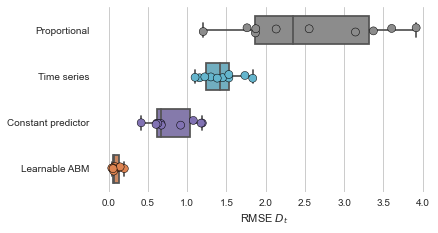

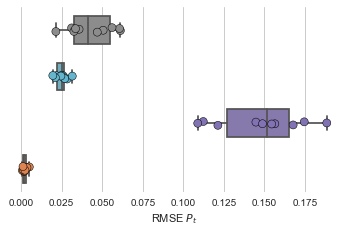

In [5]:
for (var_name, xlabel, show_ys) in [
    ("Nd", "RMSE $D_t$", True),
    ("P", "RMSE $P_t$", False)
]:
    df = pd.read_csv("../data/main-figure-forecasting-only-" + var_name + ".csv")
    df.group = df.group.apply(renaming.__getitem__)

    plt.style.use('seaborn')
    sns.set_style("whitegrid")
    plt.figure(figsize=(6, 3.4))

    ax = sns.boxplot(x="rmse", y="group", data=df,
        whis=[0, 100],
        width=.6, 
        palette=palette,
    )

    sns.stripplot(x="rmse", y="group", data=df,
        palette=palette,
        size=8, jitter=0.06,
        edgecolor="black",
        linewidth=0.5,
    )

    ax.set_xlabel(xlabel)
    ax.set_ylabel("")
    if not show_ys:
        ax.set_yticks([])
    plt.savefig(f"../paper/fig/forecasting-{var_name}.pdf", bbox_inches="tight")